In [1]:
import pandas as pd

In [7]:
df = pd.read_json('/content/TelecomX_Data.json')

In [8]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [12]:
# Separar e expandir colunas aninhadas
df_customer = df['customer'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)
df_account = df['account'].apply(pd.Series)
df_charges = df_account['Charges'].apply(pd.Series)

# Unir tudo em um único DataFrame
df_final = pd.concat([
    df[['customerID', 'Churn']],
    df_customer, df_phone, df_internet, df_account.drop('Charges', axis=1),
    df_charges
], axis=1)

df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [13]:
# Corrigir tipos
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].astype('int')
df_final['Monthly'] = pd.to_numeric(df_final['Monthly'], errors='coerce')
df_final['Total'] = pd.to_numeric(df_final['Total'], errors='coerce')

# Remover linhas com Churn em branco
df_final = df_final[df_final['Churn'].isin(['Yes', 'No'])]

# Verificar valores ausentes
df_final.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Estilo
sns.set(style='whitegrid')

<ipython-input-23-3424150132>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_final, palette='pastel')


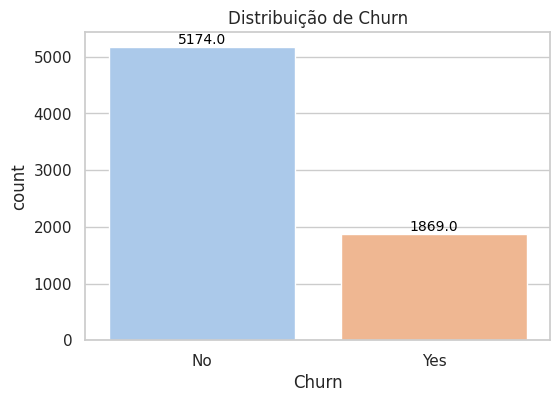

In [23]:

# Gráfico de barras com contagem de churn
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df_final, palette='pastel')
plt.title('Distribuição de Churn')

# Adicionando valores nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


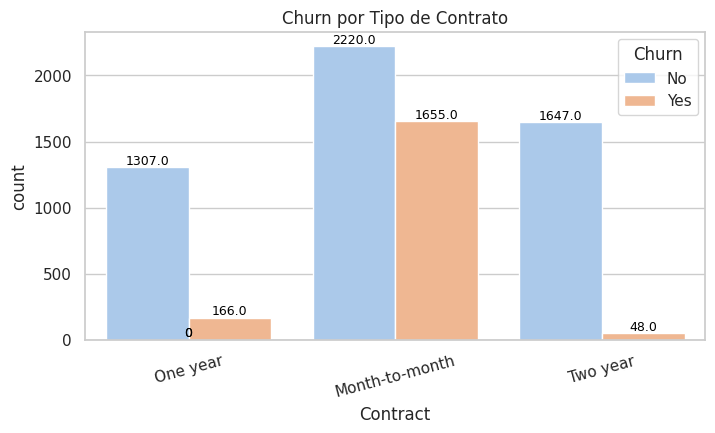

In [24]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df_final, x='Contract', hue='Churn', palette='pastel')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=15)

# Adicionando valores
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()

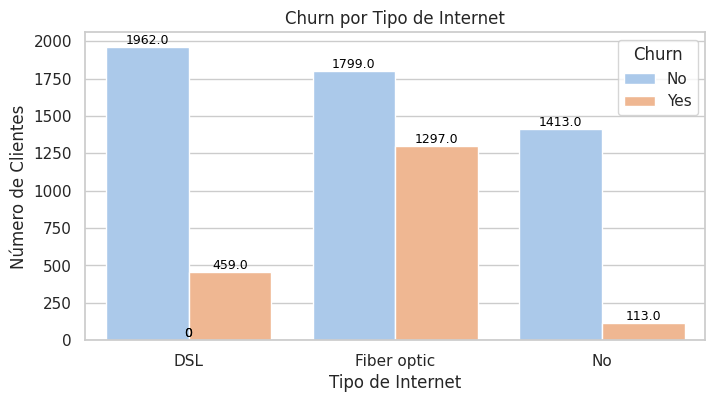

In [28]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df_final, x='InternetService', hue='Churn', palette='pastel')
plt.title('Churn por Tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Número de Clientes')

# Adicionando valores nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.show()


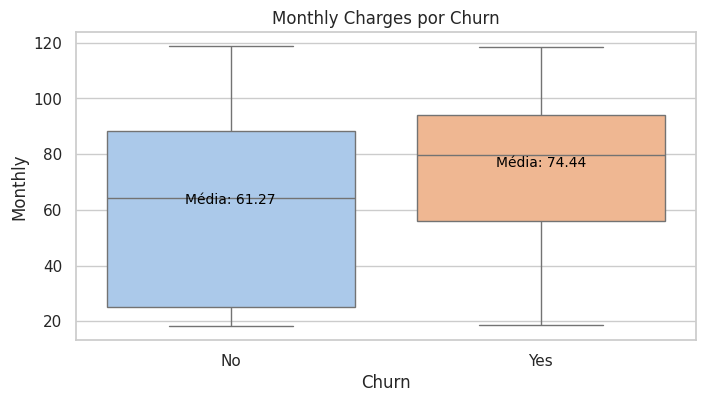

In [29]:
plt.figure(figsize=(8,4))
ax = sns.boxplot(data=df_final, x='Churn', y='Monthly', palette='pastel')
plt.title('Monthly Charges por Churn')

# Calcular média e adicionar anotação
means = df_final.groupby('Churn')['Monthly'].mean()

for i, mean_val in enumerate(means):
    ax.text(i, mean_val + 1, f'Média: {mean_val:.2f}', ha='center', color='black', fontsize=10)

plt.show()


## 📌 Conclusão

A análise revelou que:

- Clientes com contrato "Month-to-month" apresentam muito mais evasão.
- Usuários de internet via fibra óptica têm maior tendência de churn.
- Clientes com cobrança eletrônica ("PaperlessBilling: Yes") estão mais propensos a sair.
- Gastos mensais mais altos correlacionam com maior evasão.

Esses insights podem embasar a criação de modelos preditivos e ações estratégicas, como:

- Incentivos para contratos mais longos.
- Melhorar suporte a usuários de fibra óptica.
- Avaliar benefícios de pagamentos com fatura impressa.

O pipeline de ETL foi concluído com sucesso utilizando Python, Pandas, Seaborn e Matplotlib.
